In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
import sklearn.metrics
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [2]:
def encode_text_dummy(df,name):
    dummies=pd.get_dummies(df[name])
    for x in dummies.columns:
        dummy_name="{}-{}".format(name,x)
        df[dummy_name]=dummies[x]
    df.drop(name,axis=1,inplace=True)

In [23]:
df=pd.read_csv('Train.csv')
encode_text_dummy(df,'service')
encode_text_dummy(df,'flag')
encode_text_dummy(df,'protocol_type')
df.dropna(inplace=True,axis=1)

features_df = pd.concat([df])
'''features_df.to_excel(r'Train1.xlsx', sheet_name='Sheet1', index = False)'''
del features_df['xAttack']
X = features_df.as_matrix()
Y = df['xAttack']
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.25, random_state=42)


nb=GaussianNB()
nb.fit(X_train,y_train.tolist())
prediction=nb.predict(X_test)
t1=accuracy_score(y_test.tolist(), prediction)*100
print("NB-Training Set-Accuracy is ", accuracy_score(y_test.tolist(), prediction)*100)


dt=DecisionTreeClassifier(max_leaf_nodes=15)
dt.fit(X_train,y_train.tolist())
prediction=dt.predict(X_test)
t2=accuracy_score(y_test.tolist(), prediction)*100
print("DT-Training Set-Accuracy is ", accuracy_score(y_test.tolist(), prediction)*100)


lr=LogisticRegression()
lr.fit(X_train,y_train.tolist())
prediction=lr.predict(X_test)
t3=accuracy_score(y_test.tolist(), prediction)*100
print("LR-Training Set-Accuracy is ", accuracy_score(y_test.tolist(), prediction)*100)

knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train.tolist())
prediction=knn.predict(X_test)
t4=accuracy_score(y_test.tolist(), prediction)*100
print("KNN-Training Set-Accuracy is ", accuracy_score(y_test.tolist(), prediction)*100)

nw=MLPClassifier()
nw.fit(X_train,y_train.tolist())
prediction=nw.predict(X_test)
t5=accuracy_score(y_test.tolist(), prediction)*100
print("Neural NW-Training Set-Accuracy is ", accuracy_score(y_test.tolist(), prediction)*100)

svm=SVC(gamma='auto')
svm.fit(X_train,y_train.tolist())
prediction=svm.predict(X_test)
t6=accuracy_score(y_test.tolist(), prediction)*100
print("SVM-Training Set-Accuracy is ", accuracy_score(y_test.tolist(), prediction)*100)

sgd=SGDClassifier()
sgd.fit(X_train,y_train.tolist())
prediction=sgd.predict(X_test)
t7=accuracy_score(y_test.tolist(), prediction)*100
print("SGD-Training Set-Accuracy is ", accuracy_score(y_test.tolist(), prediction)*100)

from sklearn.tree import DecisionTreeClassifier  
classifier = LDA()
classifier.fit(X_train, y_train.tolist())  

prediction = classifier.predict(X_test)
t8=accuracy_score(y_test.tolist(), prediction)*100
print("LDA-Training Set-Accuracy is ", accuracy_score(y_test.tolist(), prediction)*100)


C:\Users\Code\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # Remove the CWD from sys.path while we load stuff.


NB-Training Set-Accuracy is  64.75631052548023
DT-Training Set-Accuracy is  95.42784568979204


C:\Users\Code\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Code\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Code\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LR-Training Set-Accuracy is  94.77694872201937
KNN-Training Set-Accuracy is  96.55500873154469


C:\Users\Code\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Neural NW-Training Set-Accuracy is  98.63470392125734
SVM-Training Set-Accuracy is  94.99920622321002
SGD-Training Set-Accuracy is  85.82314653119542
LDA-Training Set-Accuracy is  95.06270836640736


C:\Users\Code\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


In [26]:
df=pd.read_csv("test.csv")
df.dropna(inplace=True,axis=1)

encode_text_dummy(df,'service')
encode_text_dummy(df,'flag')
encode_text_dummy(df,'protocol_type')

features_df = pd.concat([df])

'''features_df.to_excel(r'Test1.xlsx', sheet_name='Sheet1', index = False)'''

del features_df['xAttack']
features_df.head()
x=features_df.as_matrix()
y=df['xAttack'].tolist()


a=nb.predict(x)
b=dt.predict(x)
c=lr.predict(x)
d=knn.predict(x)
e=nw.predict(x)
f=svm.predict(x)
g=sgd.predict(x)
h=classifier.predict(x)

avg=accuracy_score(y, a)*100
print("NB-Test Set-Accuracy is ", accuracy_score(y, a)*100)

avg1=accuracy_score(y, b)*100
print("DT-Test Set-Accuracy is ", accuracy_score(y, b)*100)

avg2=accuracy_score(y, c)*100
print("LR-Test Set-Accuracy is ", accuracy_score(y, c)*100)

avg3=accuracy_score(y, d)*100
print("KNN-Test Set-Accuracy is ", accuracy_score(y, d)*100)

avg4=accuracy_score(y, e)*100
print("Neural NW-Test Set-Accuracy is ", accuracy_score(y, e)*100)

avg5=accuracy_score(y, f)*100
print("SVM-Test Set-Accuracy is ", accuracy_score(y, f)*100)

avg6=accuracy_score(y, g)*100
print("SGD-Test Set-Accuracy is ", accuracy_score(y, g)*100)

avg7=accuracy_score(y, h)*100
print("LDA-Test Set-Accuracy is ", accuracy_score(y, h)*100)



algorithm=['NB','DT','LR','KNN','Neural NW','SVM','SGD','LDA']
Training=[round(t1,2),round(t2,2),round(t3,2),round(t4,2),round(t5,2),round(t6,2),round(t7,2),round(t8,2)]
Test=[round(avg),round(avg1),round(avg2),round(avg3),round(avg4),round(avg5),round(avg6),round(avg7)]

df = pd.DataFrame({'Test': Test,'Training Set': Training}, index=algorithm)
df.T


C:\Users\Code\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


NB-Test Set-Accuracy is  29.44749051033319
DT-Test Set-Accuracy is  44.88401518346689
LR-Test Set-Accuracy is  39.14803880219317
KNN-Test Set-Accuracy is  43.90552509489667
Neural NW-Test Set-Accuracy is  45.069590889919866
SVM-Test Set-Accuracy is  39.730071699704766
SGD-Test Set-Accuracy is  26.21678616617461
LDA-Test Set-Accuracy is  47.20371151412906


,NB,DT,LR,KNN,Neural NW,SVM,SGD,LDA
Test,29.00,45.00,39.00,44.00,45.00,40.0,26.00,47.00
Training Set,64.76,95.43,94.78,96.56,98.63,95.0,85.82,95.06


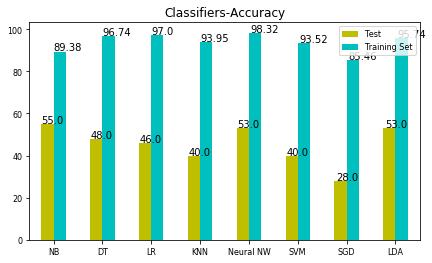

In [10]:
plt.rcParams["legend.fontsize"] = 8

ax = df.plot(kind='bar',rot=0,figsize=(8,4), title ="Classifiers-Accuracy",legend=True, fontsize=8,color=['y', 'c']) 
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

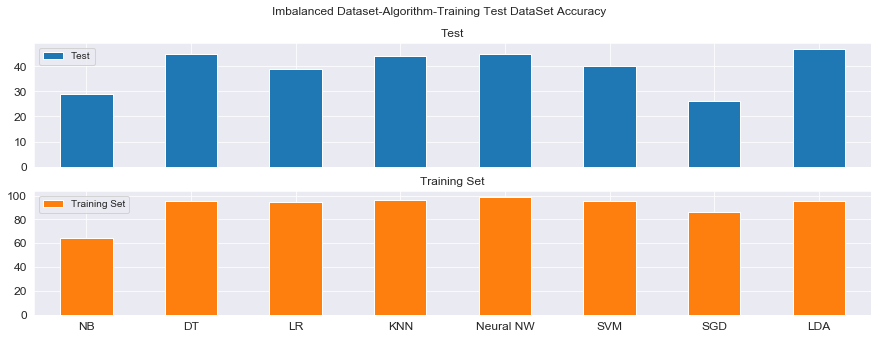

In [27]:
sns.set_style("darkgrid")
ax = df.plot.bar(subplots=True,rot=0,figsize=(15,5), title ="Imbalanced Dataset-Algorithm-Training Test DataSet Accuracy",legend=True, fontsize=12)
ax[1].legend(loc=2)  


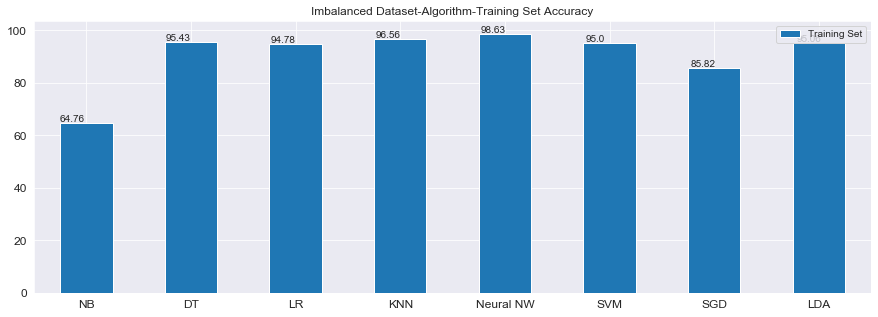

In [28]:
sns.set_style("darkgrid")
ax = df.plot.bar(y='Training Set', rot=0,figsize=(15,5), title ="Imbalanced Dataset-Algorithm-Training Set Accuracy",legend=True, fontsize=12)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

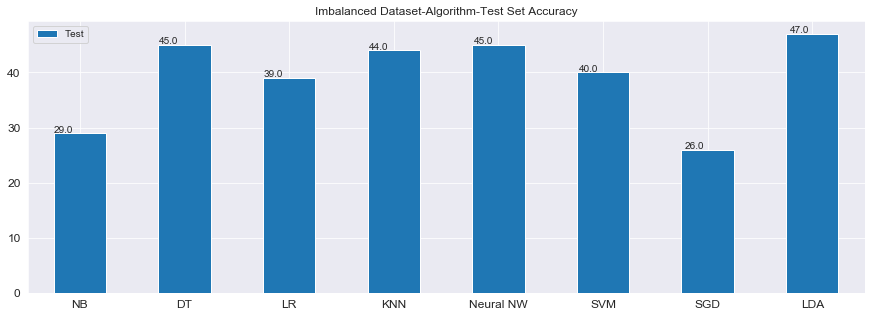

In [30]:
sns.set_style("darkgrid")

ax = df.plot.bar(y='Test', rot=0,figsize=(15,5), title ="Imbalanced Dataset-Algorithm-Test Set Accuracy",legend=True, fontsize=12)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))